# Traffic Volume Statistics

In this notebook, we will analyze the traffic data collected from various points across the Norwegian road network by performing general statistical analyses and creating visualizations. <br> 
At the end, we will generate an excel or CSV file that includes only the pertinent traffic points, which can be used for further modeling.

In [69]:
# Importing relevant packages
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/all_roads_volume.xlsx")
df

,id,name,lat,lon,volume,year,month,heading1,volume_heading1,heading2,volume_heading2
0,65823V1668921,FJØSDALEN,67.981670,13.175464,469,2018,1,Leknes,235.0,Reine,234.0
1,65823V1668921,FJØSDALEN,67.981670,13.175464,706,2018,2,Leknes,353.0,Reine,352.0
2,65823V1668921,FJØSDALEN,67.981670,13.175464,760,2018,3,Leknes,381.0,Reine,379.0
3,65823V1668921,FJØSDALEN,67.981670,13.175464,659,2018,4,Leknes,329.0,Reine,329.0
4,65823V1668921,FJØSDALEN,67.981670,13.175464,882,2018,5,Leknes,443.0,Reine,439.0
...,...,...,...,...,...,...,...,...,...,...,...
25973,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1464,2018,8,HØYANGER,734.0,VADHEIM,730.0
25974,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1431,2018,9,HØYANGER,716.0,VADHEIM,716.0
25975,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1431,2018,10,HØYANGER,716.0,VADHEIM,716.0
25976,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1407,2018,11,HØYANGER,706.0,VADHEIM,701.0


In [20]:
df_ids = df.drop_duplicates(subset="id")

# Convert the dataframe to geodataframes, using "geometry" column as the geometry
df_ids['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)    # create a new column with a Point object for each row
gdf_ids = gpd.GeoDataFrame(df_ids, geometry='geometry')                             # convert the DataFrame to a GeoDataFrame
gdf_ids.crs = {'init': 'epsg:4326'}                                                 # set the coordinate reference system (CRS) to WGS84 (EPSG:4326)

/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_80311/3544612464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ids['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)    # create a new column with a Point object for each row
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


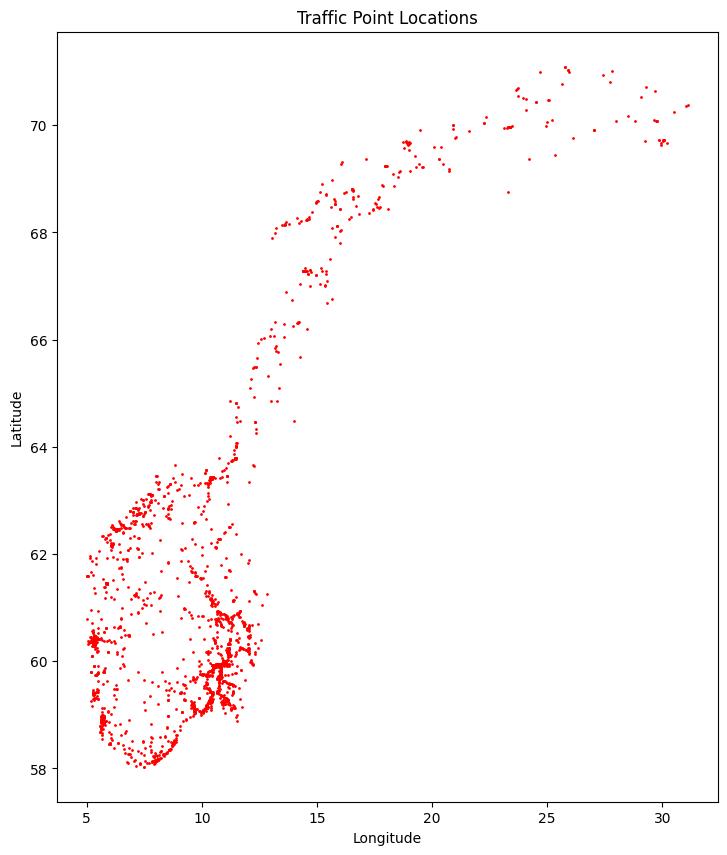

In [22]:
# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(15, 10))            # Size
gdf_ids.plot(ax=ax, markersize=1, color = 'red')    # plot points in red
ax.set_title("Traffic Point Locations")             # Add a title and axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


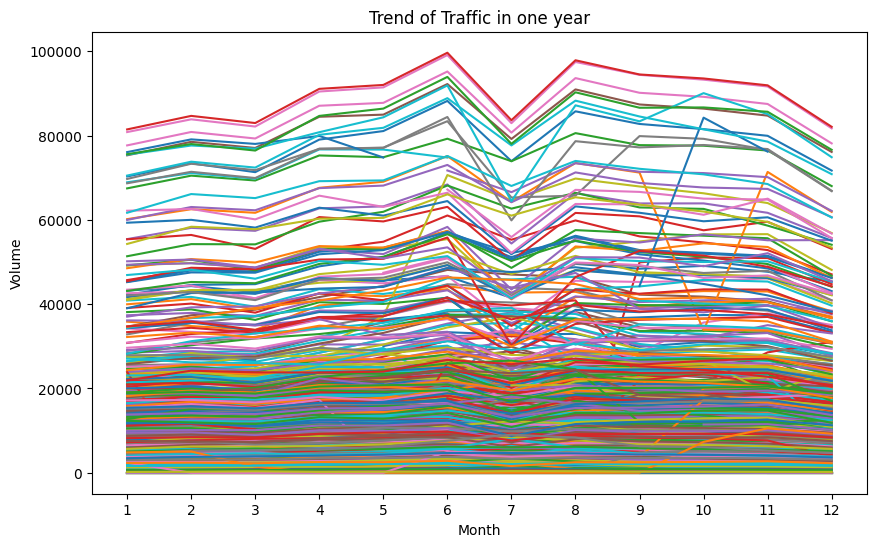

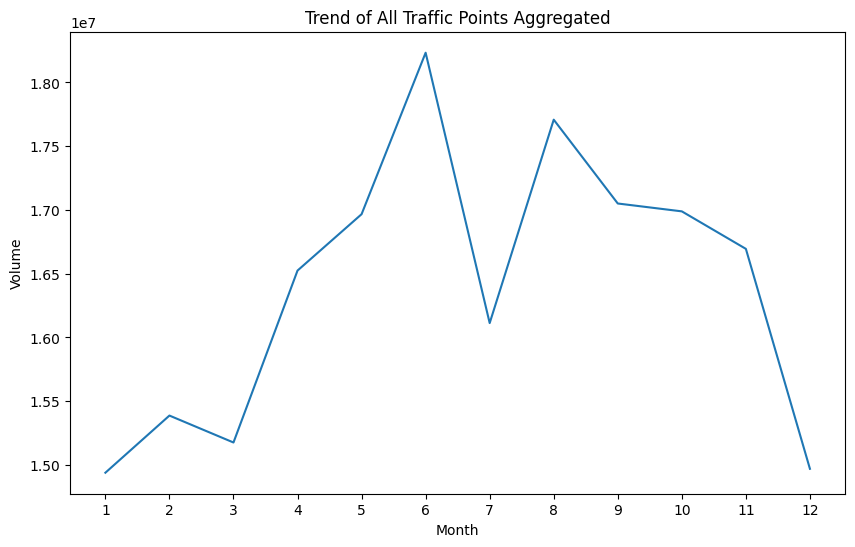

In [66]:
# pivot the DataFrame to create a table of monthly volumes for each traffic point
pivot_table = df.pivot_table(index=['id', 'name'], columns='month', values='volume')

# create a line plot for each traffic point on the same axis
plt.figure(figsize=(10, 6))
for idx, row in pivot_table.iterrows():
    plt.plot(row.index, row.values, label=idx[1])

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.ylabel('Volume')
plt.title('Trend of Traffic in one year')

# group the DataFrame by month and aggregate the volume values
monthly_volumes = df.groupby('month')['volume'].sum()


# create a line plot of the monthly volumes
plt.figure(figsize=(10,6))
plt.plot(monthly_volumes.index, monthly_volumes.values)

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Trend of All Traffic Points Aggregated')
plt.xticks(range(1, 13))


plt.show()


We notice a significant trend in the volume datase over the 12 months. <br>
Regarding the decrease in June/July and December/January this is most likely because of the holiday. 

## Removal of non-complet traffic points

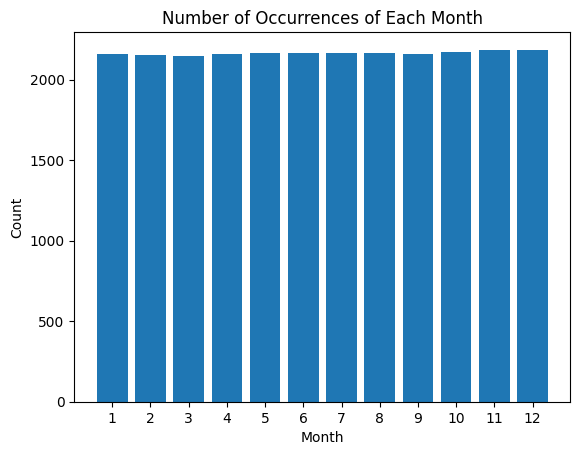

Volume in Months:
January : 2160
February : 2152
March : 2145
April : 2158
May : 2167
June : 2166
July : 2164
August : 2162
September : 2161
October : 2173
November : 2185
Desember : 2185


In [52]:
# count the number of occurrences of each month and sort by month
monthly_counts = df['month'].value_counts().sort_index()

# create a bar plot of the monthly counts
plt.bar(monthly_counts.index, monthly_counts.values)

# set the x-axis label, y-axis label, title, and ticks
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Month')
plt.xticks(range(1, 13))
plt.show()

# count the number of occurrences of each month and sort by month
monthly_counts = df['month'].value_counts().sort_index()
monthlist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember']
print('Volume in Months:')

for i in range(len(monthly_counts)):
    month = monthlist[i]
    print(month, ":", monthly_counts.values[i])


*There are multiple traffic points that are "non-complete" and missing data for some months. We therefore remove all these non-complete traffic points.*

In [59]:
grouped = df.groupby('id')['month'].nunique()                                       # First, we group by the id and count the number of unique months for each id
ids_with_12_months = grouped[grouped == 12].index                                   # Then, we filter the grouped data to get the ids that have 12 unique months
sub_df = df[df['id'].isin(ids_with_12_months)]                                      # Finally, we filter the original DataFrame to get rows that have ids in ids_with_12_months
sub_df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)    # create a new column with a Point object for each row
sub_df = gpd.GeoDataFrame(sub_df, geometry='geometry')                              # convert the DataFrame to a GeoDataFrame
sub_df.crs = {'init': 'epsg:4326'}                                                  # set the coordinate reference system (CRS) to WGS84 (EPSG:4326)

sub_df

/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_80311/436886659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)    # create a new column with a Point object for each row
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,id,name,lat,lon,volume,year,month,heading1,volume_heading1,heading2,volume_heading2,geometry
0,65823V1668921,FJØSDALEN,67.981670,13.175464,469,2018,1,Leknes,235.0,Reine,234.0,POINT (13.17546 67.98167)
1,65823V1668921,FJØSDALEN,67.981670,13.175464,706,2018,2,Leknes,353.0,Reine,352.0,POINT (13.17546 67.98167)
2,65823V1668921,FJØSDALEN,67.981670,13.175464,760,2018,3,Leknes,381.0,Reine,379.0,POINT (13.17546 67.98167)
3,65823V1668921,FJØSDALEN,67.981670,13.175464,659,2018,4,Leknes,329.0,Reine,329.0,POINT (13.17546 67.98167)
4,65823V1668921,FJØSDALEN,67.981670,13.175464,882,2018,5,Leknes,443.0,Reine,439.0,POINT (13.17546 67.98167)
...,...,...,...,...,...,...,...,...,...,...,...,...
25973,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1464,2018,8,HØYANGER,734.0,VADHEIM,730.0,POINT (6.05828 61.20710)
25974,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1431,2018,9,HØYANGER,716.0,VADHEIM,716.0,POINT (6.05828 61.20710)
25975,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1431,2018,10,HØYANGER,716.0,VADHEIM,716.0,POINT (6.05828 61.20710)
25976,32977V384525,KVERNHAUGTUNNELEN,61.207095,6.058275,1407,2018,11,HØYANGER,706.0,VADHEIM,701.0,POINT (6.05828 61.20710)


In [64]:
# count the number of occurrences of each month and sort by month
monthly_counts = sub_df['month'].value_counts().sort_index()
monthlist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember']
print('Volume in Months:')

for i in range(len(monthly_counts)):
    month = monthlist[i]
    print(month, ":", monthly_counts.values[i])
print('')
print('Nice Bruh! We continue...')


Volume in Months:
January : 2028
February : 2028
March : 2028
April : 2028
May : 2028
June : 2028
July : 2028
August : 2028
September : 2028
October : 2028
November : 2028
Desember : 2028

Nice Bruh! We continue...


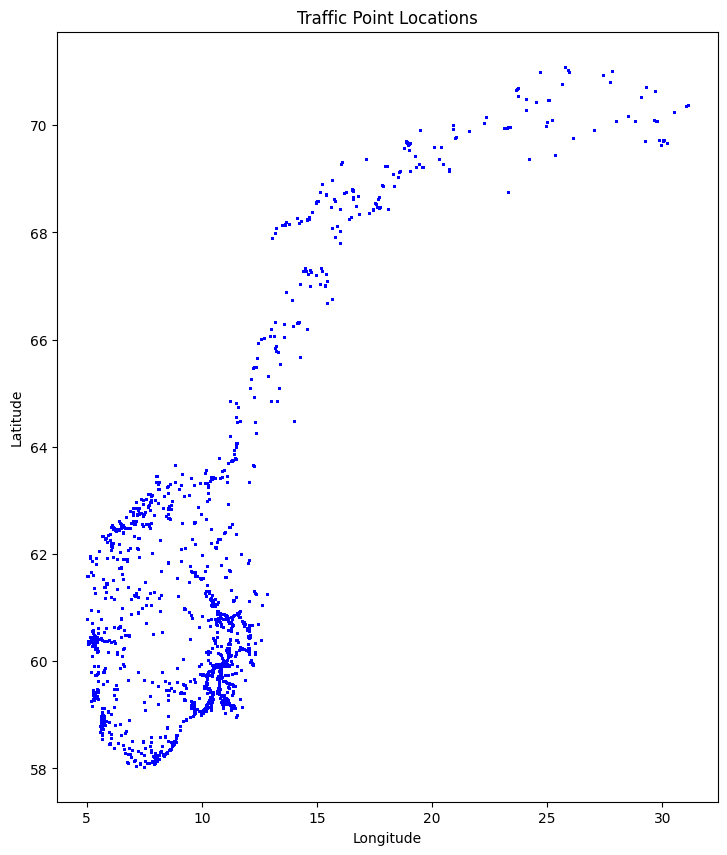

Looks like the removal of the traffic points did not affect the dataset in total. Good one.


In [65]:
# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(15, 10))            # Size
sub_df.plot(ax=ax, markersize=1, color = 'blue')    # plot points in red
ax.set_title("Traffic Point Locations")             # Add a title and axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()
print('Looks like the removal of the traffic points did not affect the dataset in total. Good one.')


In [84]:
# Randomly choose between volume_heading1 and volume_heading2 for random_column1
sub_df['random_column1'] = np.where(np.random.rand(len(sub_df)) < 0.5, sub_df['volume_heading1'], sub_df['volume_heading2'])

# Set random_column2 equal to the other volume_heading value
sub_df['random_column2'] = np.where(sub_df['random_column1'] == sub_df['volume_heading1'], sub_df['volume_heading2'], sub_df['volume_heading1'])
sub_df["ratio_random"]=sub_df["random_column1"]/(sub_df["random_column1"]+sub_df["random_column2"])
random_ratio=np.mean(sub_df["ratio_random"])

print("The mean random ratio between heading volume is:",round(random_ratio, 6))

The mean random ratio between heading volume is: 0.50018


In [73]:
sub_df["ratio"]=sub_df["volume_heading1"]/(sub_df["volume_heading1"]+sub_df["volume_heading2"])
mean_ratio = np.mean(sub_df["ratio"])

print("The mean ratio between heading volume is: ", round(mean_ratio, 2))

The mean ratio between heading volume is:  0.46


In [76]:
sub_df.head()

,id,name,lat,lon,volume,year,month,heading1,volume_heading1,heading2,volume_heading2,geometry,ratio
0,65823V1668921,FJØSDALEN,67.98167,13.175464,469,2018,1,Leknes,235.0,Reine,234.0,POINT (13.17546 67.98167),0.501066
1,65823V1668921,FJØSDALEN,67.98167,13.175464,706,2018,2,Leknes,353.0,Reine,352.0,POINT (13.17546 67.98167),0.500709
2,65823V1668921,FJØSDALEN,67.98167,13.175464,760,2018,3,Leknes,381.0,Reine,379.0,POINT (13.17546 67.98167),0.501316
3,65823V1668921,FJØSDALEN,67.98167,13.175464,659,2018,4,Leknes,329.0,Reine,329.0,POINT (13.17546 67.98167),0.500000
4,65823V1668921,FJØSDALEN,67.98167,13.175464,882,2018,5,Leknes,443.0,Reine,439.0,POINT (13.17546 67.98167),0.502268


In [ ]:
import folium
from folium.plugins import HeatMap

# create a map centered on the mean latitude and longitude of the traffic points
center_lat, center_lon = sub_df['lat'].mean(), sub_df['lon'].mean()
#m = folium.Map(location=[center_lat, center_lon], zoom_start=10)
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='Stamen Terrain')

# create a heatmap layer from the traffic point coordinates and volumes
heat_data = [[row['lat'], row['lon'], row['volume']] for idx, row in sub_df.iterrows()]
HeatMap(heat_data, name='Traffic Volume').add_to(m)

# add a layer control to toggle the heatmap on and off
folium.LayerControl().add_to(m)

# display the map
m


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


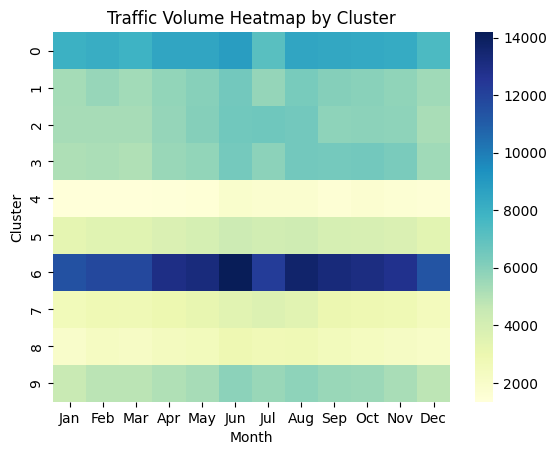

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# extract the latitude and longitude columns from the DataFrame
X = df[['lat', 'lon']]

# fit a k-means clustering model with 10 clusters
kmeans = KMeans(n_clusters=10).fit(X)

# add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# calculate the mean traffic volume for each cluster and month
cluster_data = df.groupby(['cluster', 'month'])['volume'].mean().unstack()

# create a heatmap of the cluster centers
sns.heatmap(cluster_data, cmap='YlGnBu')

# set the x-axis label, y-axis label, title, and ticks
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.title('Traffic Volume Heatmap by Cluster')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# extract the latitude and longitude columns from the DataFrame
X = df[['lat', 'lon']]

# fit a k-means clustering model with 10 clusters
kmeans = KMeans(n_clusters=10).fit(X)

# add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# calculate the mean traffic volume for each cluster and month
cluster_data = df.groupby(['cluster', 'month'])['volume'].mean().unstack()

# create a heatmap of the cluster centers with the y-axis inverted
sns.heatmap(cluster_data, cmap='YlGnBu', invert_yaxis=True)

# set the x-axis label, y-axis label, title, and ticks
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.title('Traffic Volume Heatmap by Cluster')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [89]:
# write the DataFrame to an Excel file
sub_df.to_excel('/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/TrafficVolume/data/allRoadsVolume_cleaned.xlsx', index=False)